##**Implementing Logistic Regression from Scratch**

##**Dataset Preparation**

### **Importing Necessary Libraries**

In [226]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


### **Loading and displaying the dataset**

In [227]:
def load_data(path="StressLevelDataset.csv"):
    """
    Load the StressLevelDataset dataset from a CSV file.
    """
    try:
        df = pd.read_csv(path)
        print("Dataset Loaded Successfully!")
        print(f"Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print("Error: File not Found!")
        return None

df = load_data()
if df is None:
    raise SystemExit("Dataset Not Loaded !")

Dataset Loaded Successfully!
Shape: (1100, 21)


### **Inspecting datatypes of Dataset**

In [228]:
# Printing the Datatypes of the Dataset
print(df.dtypes)

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


###**Seperating Numerical and Categorical Column**

In [229]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

Categorical Features:
[]


###**Descriptive Statistics of the Dataset**

In [230]:
def Descriptive_Statistics():
      print("\nDescriptive Statistics of Dataset:\n")
      print(df.describe())

Descriptive_Statistics()


Descriptive Statistics of Dataset:

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.00000

### **Inspecting Missing Values in Dataset**

In [231]:
def missing_values():
    #checking for missing values
    print(df.isnull().sum())

missing_values()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


### **Visualization of Columns**  

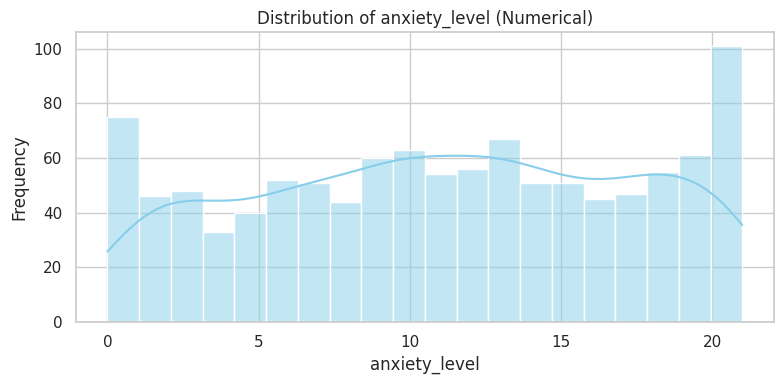

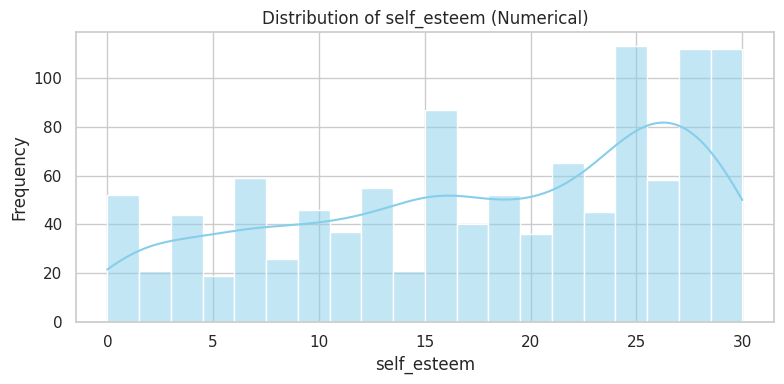

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


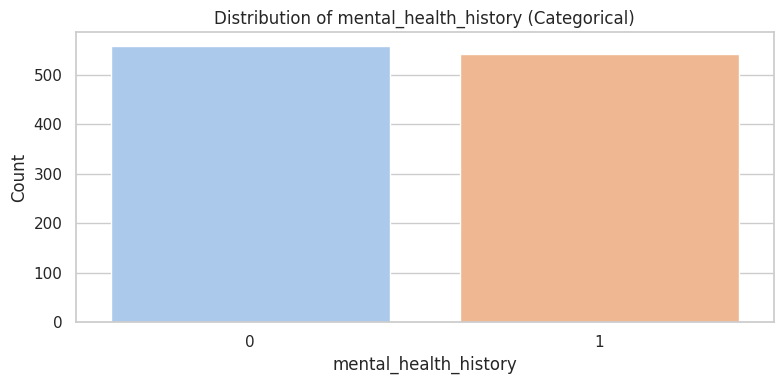

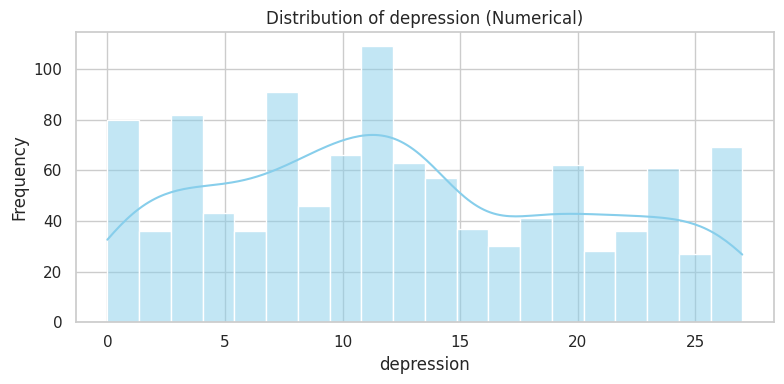

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


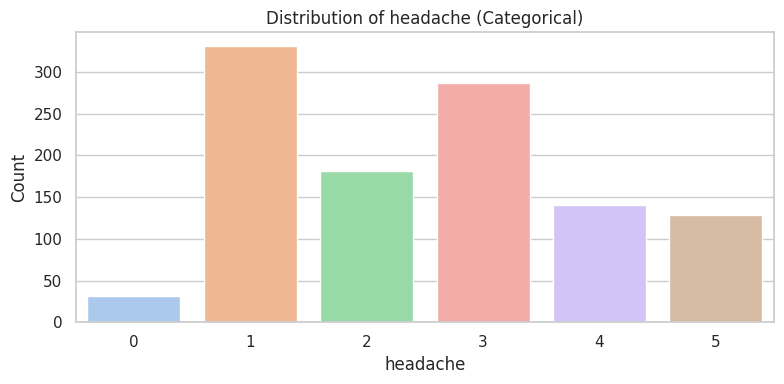

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


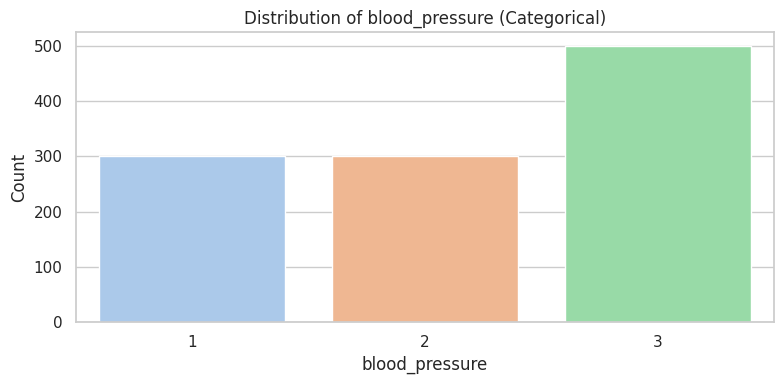

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


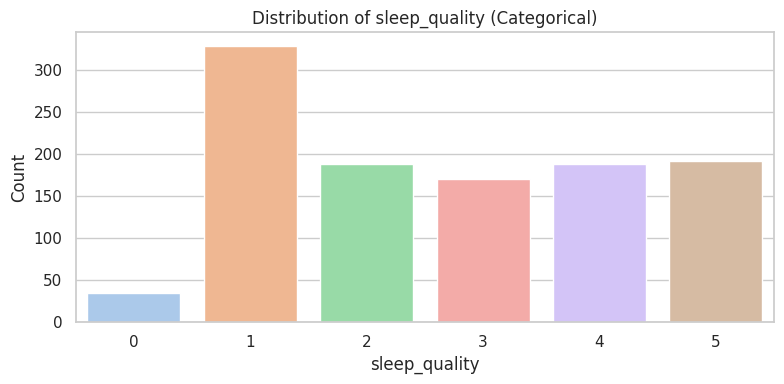

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


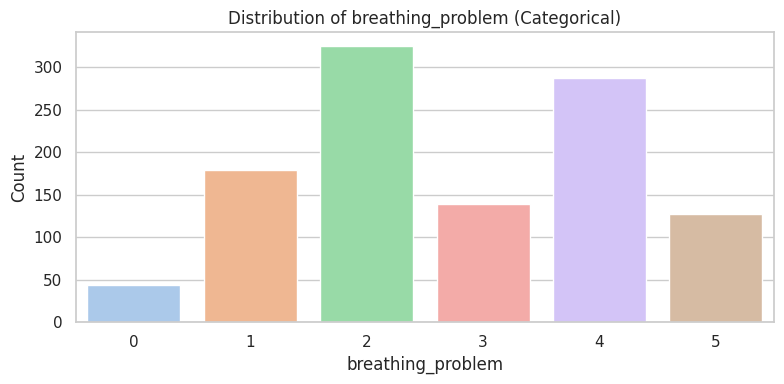

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


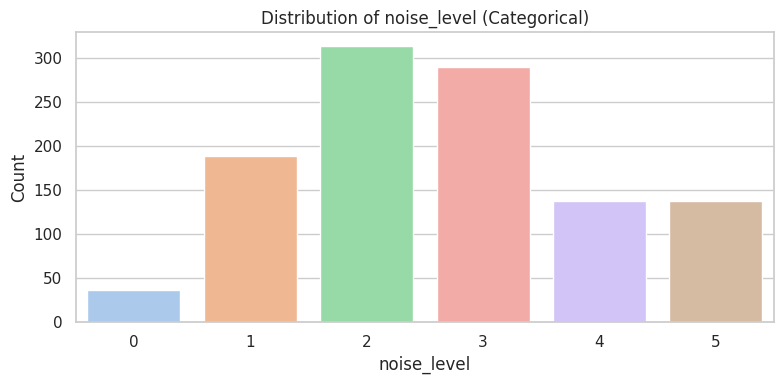

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


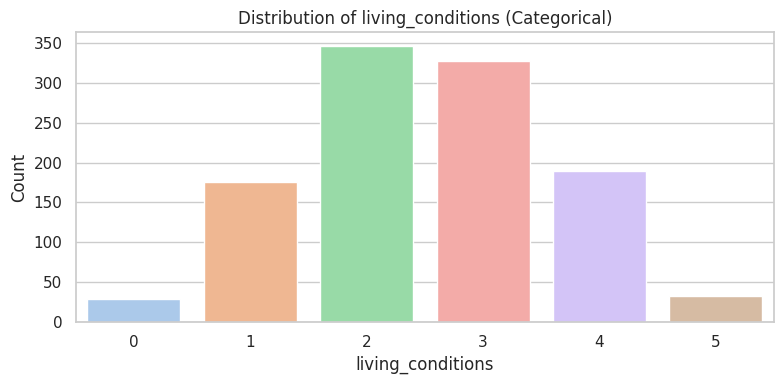

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


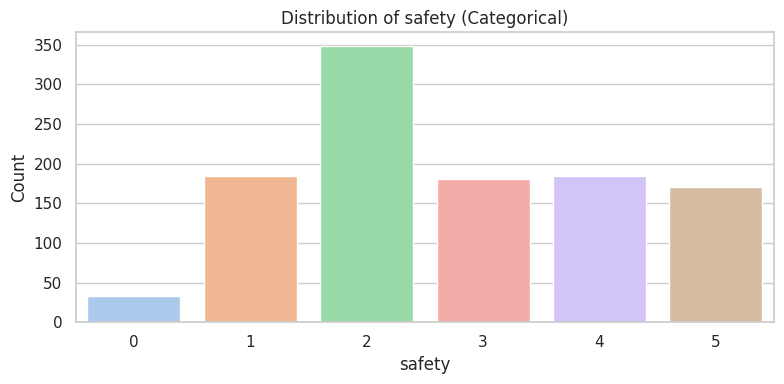

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


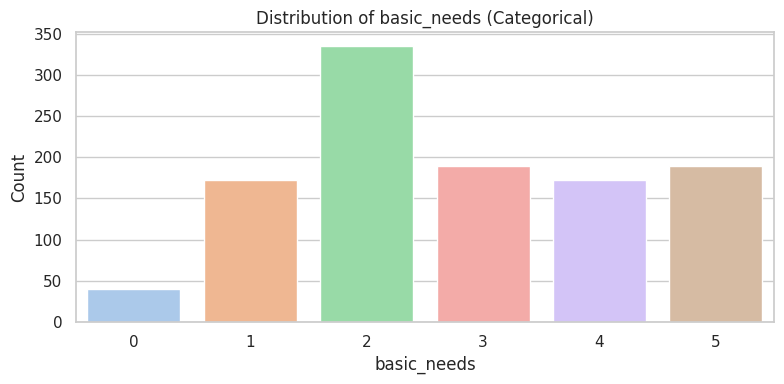

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


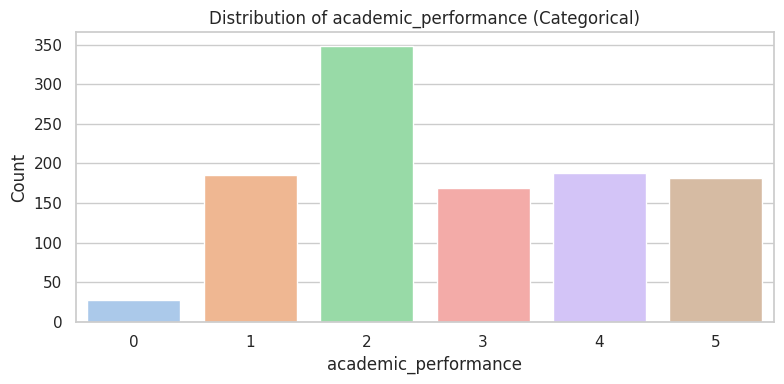

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


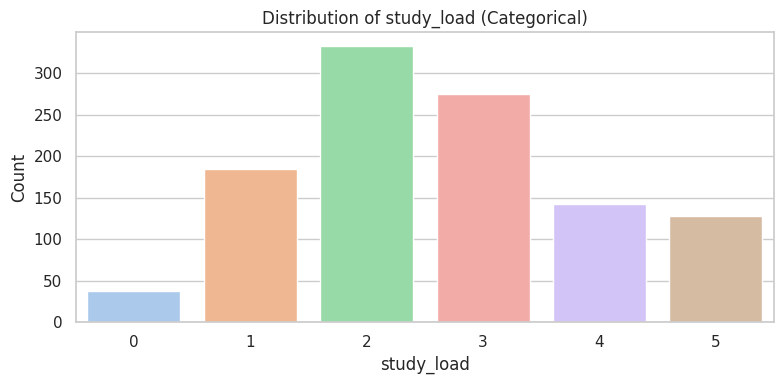

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


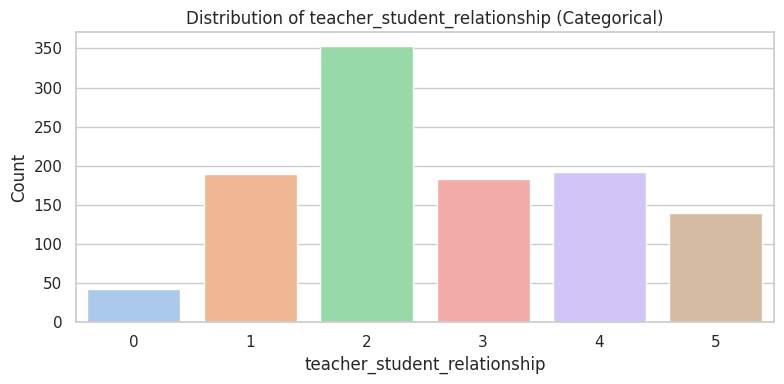

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


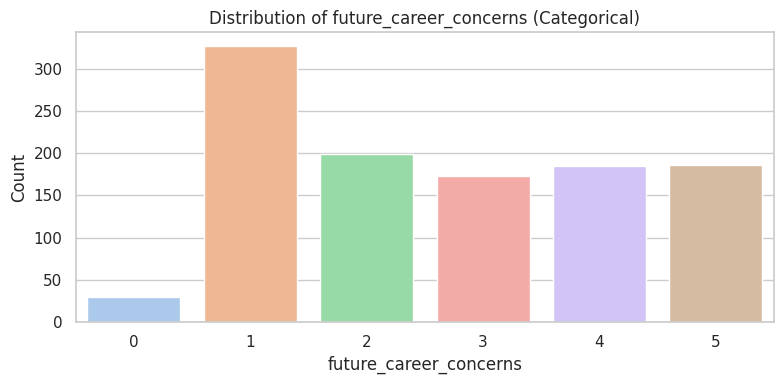

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


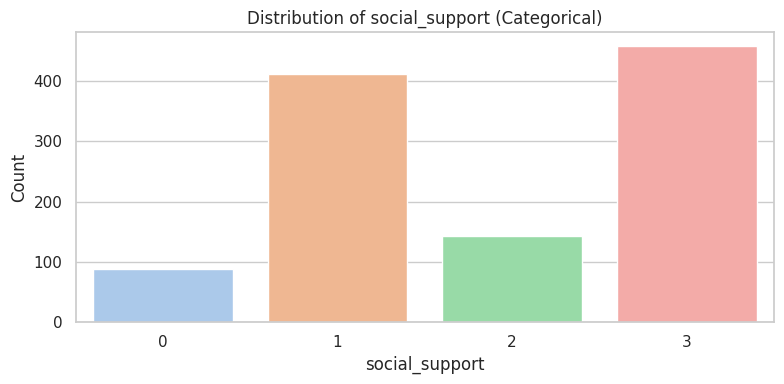

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


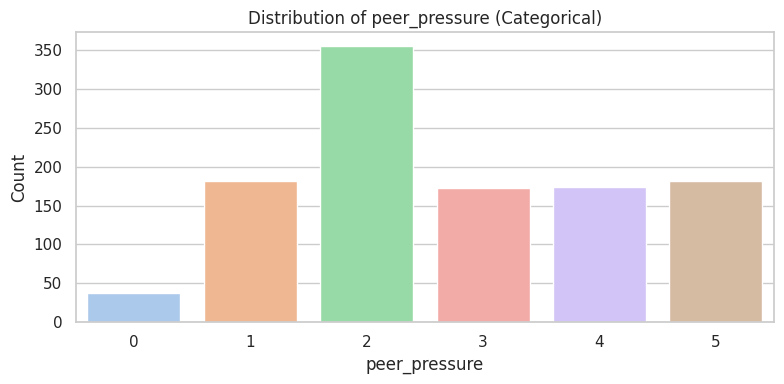

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


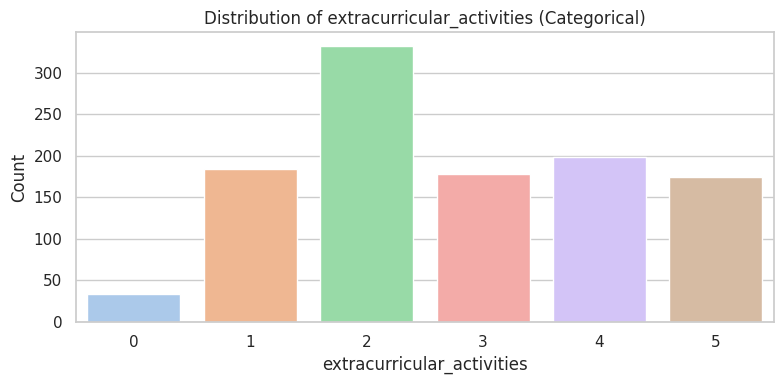

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


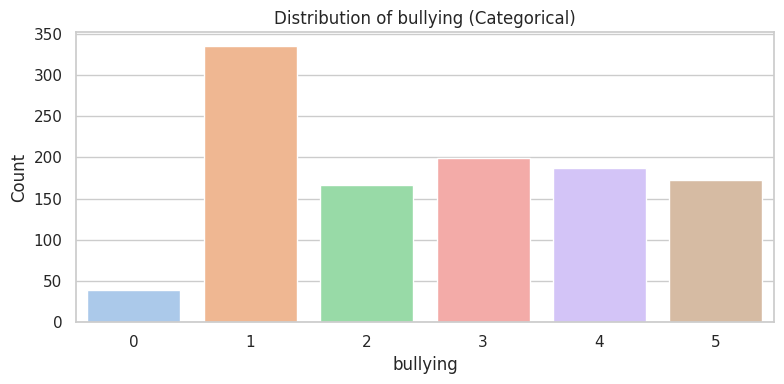

<ipython-input-232-d48c3d9510c3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


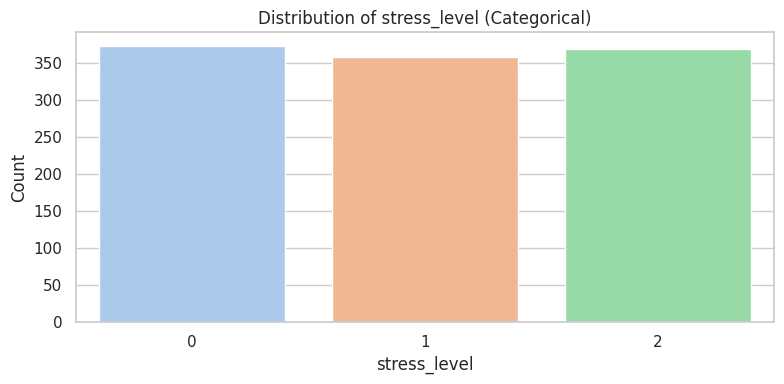

In [232]:
def visualize_columns(df):
    # Set plot style
    sns.set(style="whitegrid")

    # Iterate over all columns
    for column in df.columns:
        plt.figure(figsize=(8, 4))

        if df[column].nunique() <= 6:
            # Barplot for categorical
            sns.countplot(data=df, x=column, palette="pastel")
            plt.title(f'Distribution of {column} (Categorical)')
            plt.xlabel(column)
            plt.ylabel('Count')
        else:
            # Histogram for numerical
            sns.histplot(df[column], kde=True, color='skyblue', bins=20)
            plt.title(f'Distribution of {column} (Numerical)')
            plt.xlabel(column)
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

visualize_columns(df)


###**Correlation Visualization**


Correlations with 'Stress Level'(target):

anxiety_level: 0.7368
self_esteem: -0.7562
mental_health_history: 0.6486
depression: 0.7344
headache: 0.7135
blood_pressure: 0.3942
sleep_quality: -0.7491
breathing_problem: 0.5740
noise_level: 0.6634
living_conditions: -0.5817
safety: -0.7096
basic_needs: -0.7090
academic_performance: -0.7209
study_load: 0.6342
teacher_student_relationship: -0.6802
future_career_concerns: 0.7426
social_support: -0.6325
peer_pressure: 0.6907
extracurricular_activities: 0.6930
bullying: 0.7512





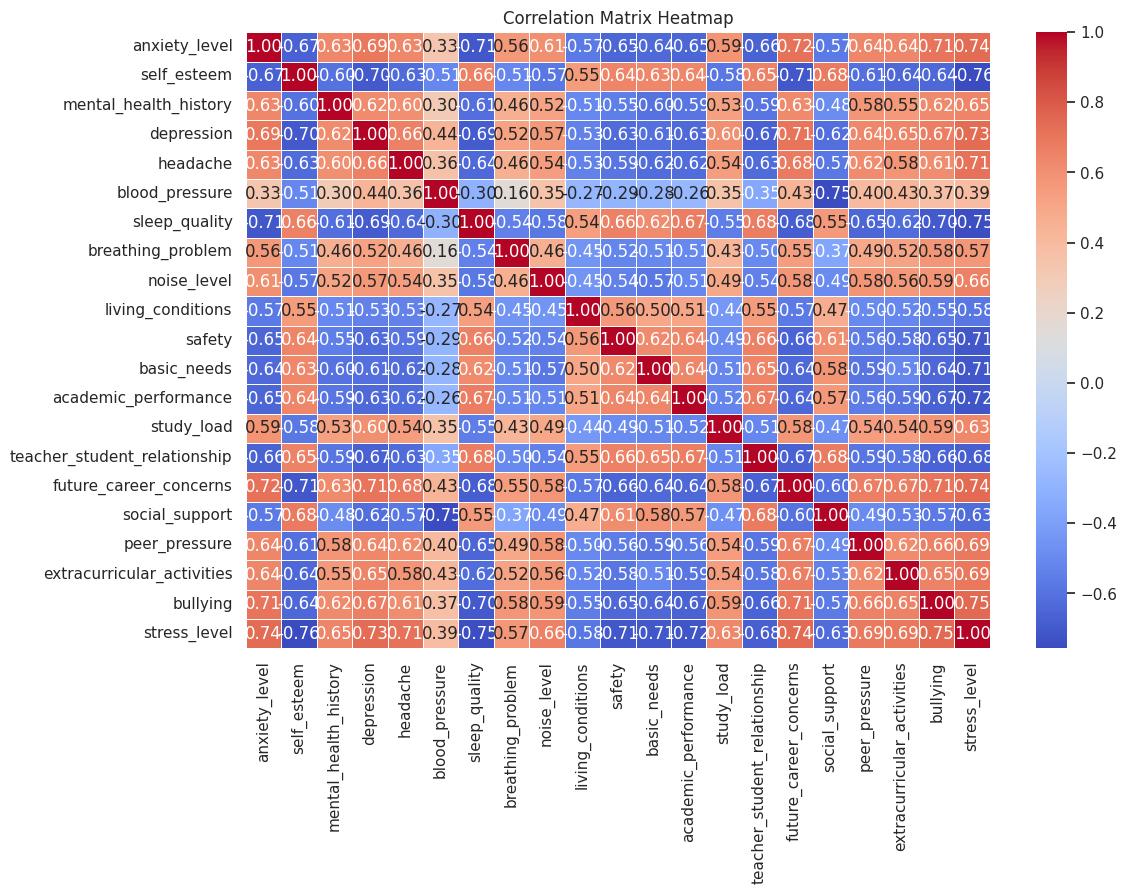

In [233]:
def correlation_visualization(df):
    # Compute correlations
    corr_matrix = df.corr()

    # Print correlations with Stress Level
    correlations = corr_matrix['stress_level'].drop('stress_level')
    print(f"\nCorrelations with \'Stress Level\'(target):\n")
    for feature, corr in correlations.items():
        print(f"{feature}: {corr:.4f}")

    print("\n\n")
    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

correlation_visualization(df)

###**Feature Engineering:**

In [234]:
#Feature Engineering
def engineer_features(df):
    """
    Create new features to enhance model performance.
    """
    df['mental_health_composite'] = df['anxiety_level'] + df['depression'] + (30-df['self_esteem'])   # total sum of anxienty level , depression and self esteem
    df['social_stress_interaction'] = df['bullying'] + df['peer_pressure']                            # total stress from social dimension
    print("\nEngineered Features Added:\n")
    print(df[['mental_health_composite', 'social_stress_interaction']].head())
    return df

df = engineer_features(df)
print("\nDisplaying Dataset after Feature Engineering:\n")
print(df.head().T)


Engineered Features Added:

   mental_health_composite  social_stress_interaction
0                       35                          5
1                       52                          9
2                       38                          5
3                       49                          9
4                       25                         10

Displaying Dataset after Feature Engineering:

                               0   1   2   3   4
anxiety_level                 14  15  12  16  16
self_esteem                   20   8  18  12  28
mental_health_history          0   1   1   1   0
depression                    11  15  14  15   7
headache                       2   5   2   4   2
blood_pressure                 1   3   1   3   3
sleep_quality                  2   1   2   1   5
breathing_problem              4   4   2   3   1
noise_level                    2   3   2   4   3
living_conditions              3   1   2   2   2
safety                         3   2   3   2   4
basic_needs

###**Features Selection**

In [235]:
# Features Selection
def features_selection(df):
    """
    Drop specified redundant features from the feature of dataset.
    """
    y = df['stress_level']
    X = df.drop(columns=['stress_level'])

    features_to_drop = [
        "anxiety_level", "depression",'self_esteem',  # Replaced by mental_health_composite
        "bullying",'peer_pressure'                   # Part of social_stress_interaction
    ]

    X = X.drop(columns=features_to_drop, errors="ignore")
    print("\n\tDropped the following redundant features:\n")
    print(features_to_drop)

    return X,y

X , y = features_selection(df)
print("\n\tFeatures(Independent Variable):\n",X.head(3).T)
print("\n\tTarget(Dependent Variable):\n",y.head(3).T)



	Dropped the following redundant features:

['anxiety_level', 'depression', 'self_esteem', 'bullying', 'peer_pressure']

	Features(Independent Variable):
                                0   1   2
mental_health_history          0   1   1
headache                       2   5   2
blood_pressure                 1   3   1
sleep_quality                  2   1   2
breathing_problem              4   4   2
noise_level                    2   3   2
living_conditions              3   1   2
safety                         3   2   3
basic_needs                    2   2   2
academic_performance           3   1   2
study_load                     2   4   3
teacher_student_relationship   3   1   3
future_career_concerns         3   5   2
social_support                 2   1   2
extracurricular_activities     3   5   2
mental_health_composite       35  52  38
social_stress_interaction      5   9   5

	Target(Dependent Variable):
 0    1
1    2
2    1
Name: stress_level, dtype: int64


## **Spliting Data**

###**Spliting data into Training and Testing Sets**

In [236]:
#Train Test Spliting of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set (80%):")
print("X:",X_train.shape)
print("Y",y_train.shape)

print("\nTesting Set (20%):")
print("X:",X_test.shape)
print("Y",y_test.shape)



Training Set (80%):
X: (880, 17)
Y (880,)

Testing Set (20%):
X: (220, 17)
Y (220,)


###**Normalizing Features (Scaling) for Gradient Descent**

In [237]:
# feature scaling (Normalize (Z-transformation) features for gradient descent)
# Formula is: X(scaled) = (X(original)-u(Mean))/sigma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Implementing Logistic Regression**

###**Initializing Weights and Biases**

In [239]:
n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

print("\nNumber of Features: ",n_features)
print("\nNumber of Classes: ",n_classes)

# Initializing weights with zeros (number of features x number of classes)
Weights = np.zeros((n_features, n_classes))

# Initializing biases with zeros (1 x number of classes)
Bias = np.zeros((1, n_classes))

print("\nWeights Shape:", Weights.shape)
print("\nBias Shape:", Bias.shape)



Number of Features:  17

Number of Classes:  3

Weights Shape: (17, 3)

Bias Shape: (1, 3)


###**Softmax Function**

In [240]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

###**One Hot Label Coding**

In [241]:
def one_hot(y, num_classes):
    one_hot_encoded = np.zeros((y.size, num_classes))
    one_hot_encoded[np.arange(y.size), y] = 1
    return one_hot_encoded

y_train_encoded = one_hot(y_train, n_classes)

###**Cross Entropy Loss Function**

In [242]:
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / m
    return loss

## **Training Model**

Training Procedure

In [243]:
def train(X, y, Weights, Bias, epochs=1000, lr=0.01):
    m = X.shape[0]

    for i in range(epochs):
        # Forward propagation
        z = np.dot(X, Weights) + Bias   # (m, n_classes)
        y_pred = softmax(z)             # (m, n_classes)

        # Loss computation
        loss = cross_entropy_loss(y, y_pred)

        # Backward propagation
        dz = (y_pred - y) / m                   # (m, n_classes)
        dW = np.dot(X.T, dz)                    # (n_features, n_classes)
        db = np.sum(dz, axis=0, keepdims=True)  # (1, n_classes)

        # Gradient Descent Updates
        Weights -= lr * dW
        Bias -= lr * db

        # Print loss every 100 iterations
        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return Weights , Bias

Calculating Optimal Weights by Running Training Procedure

In [244]:
Weights_trained, Bias_trained = train(X_train, y_train_encoded, Weights, Bias, epochs=1000, lr=0.1)

Epoch 0: Loss = 1.0986
Epoch 100: Loss = 2.4347
Epoch 200: Loss = 1.8947
Epoch 300: Loss = 1.2137
Epoch 400: Loss = 9.1093
Epoch 500: Loss = 0.9537
Epoch 600: Loss = 1.1261
Epoch 700: Loss = 0.9444
Epoch 800: Loss = 1.1291
Epoch 900: Loss = 1.1925


## **Predictions**

In [245]:
def predict(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)

# Predict on training data
predictions = predict(X_train, Weights_trained, Bias_trained)

print("First 10 Predictions:\n",predictions[:10])  # first 10 predictions

First 10 Predictions:
 [1 1 1 1 0 0 1 1 1 0]


## **Performance Evaluation**

Evaluation Procedure

In [246]:
def evaluate_model(X, y_true, W, b):
    # 1. Forward propagation (get logits and softmax probs)
    z = np.dot(X, W) + b
    y_pred_probs = softmax(z)

    # 2. Convert probabilities to predicted class labels
    y_pred_labels = np.argmax(y_pred_probs, axis=1)

    # 3. If y_true is one-hot encoded, convert it back to labels
    if y_true.ndim > 1:
        y_true_labels = np.argmax(y_true, axis=1)
    else:
        y_true_labels = y_true

    # 4. Compute performance metrics
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='macro')
    recall = recall_score(y_true_labels, y_pred_labels, average='macro')
    f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

    # 5. Confusion matrix and classification report
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    report = classification_report(y_true_labels, y_pred_labels)

    # 6. Print results
    print("\n\tModel Performance:")
    print(f"Accuracy(%)   : {accuracy*100:.4f}")
    print(f"Precision     : {precision:.4f}")
    print(f"Recall        : {recall:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print("\n\tConfusion Matrix:")
    print(cm)
    print("\n\tClassification Report:")
    print(report)

    # 7. Return metrics if needed later
    return accuracy, precision, recall, f1

Evaluating Model on Test Data

In [247]:
evaluate_model(X_test, y_test, Weights_trained, Bias_trained)


	Model Performance:
Accuracy(%)   : 86.8182
Precision     : 0.8707
Recall        : 0.8683
F1 Score      : 0.8685

	Confusion Matrix:
[[65  7  4]
 [ 4 65  4]
 [ 2  8 61]]

	Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.88        76
           1       0.81      0.89      0.85        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



(0.8681818181818182,
 0.8706836429203239,
 0.8682763487921038,
 0.8684851718465163)

Plotting Confusion Matrix

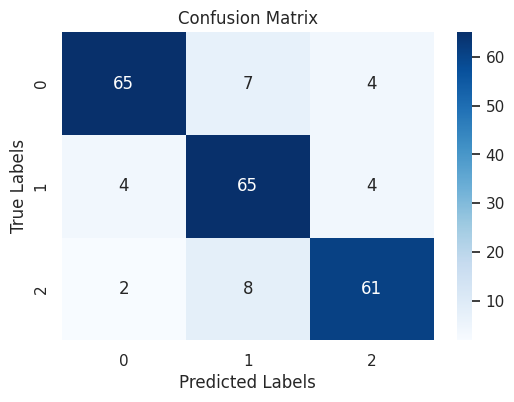

In [248]:
def plot_confusion_matrix(y_true, y_pred_labels, class_names=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred_labels)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, predict(X_test, Weights_trained, Bias_trained), class_names=np.unique(y), title="Confusion Matrix")

Visualizing feature Importance/Contribution for each Class

<ipython-input-249-930d20033efa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=feature_names, palette="viridis")


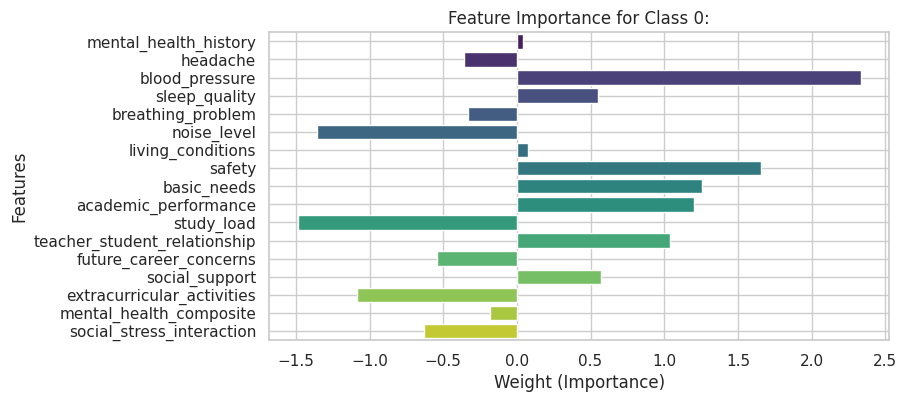

<ipython-input-249-930d20033efa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=feature_names, palette="viridis")


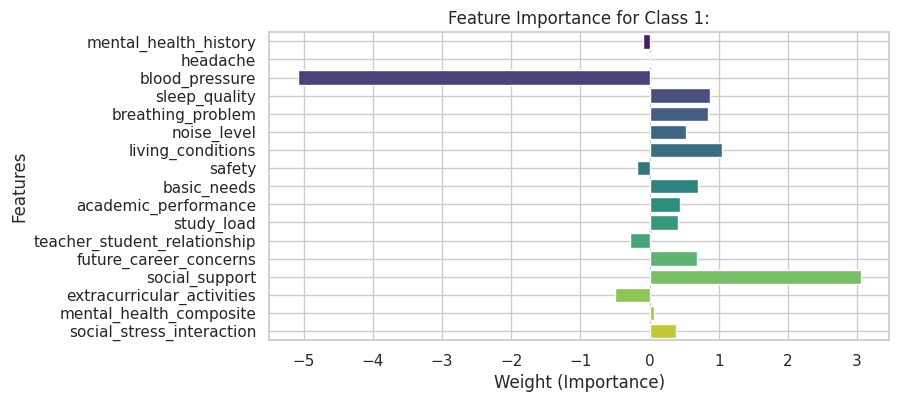

<ipython-input-249-930d20033efa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=feature_names, palette="viridis")


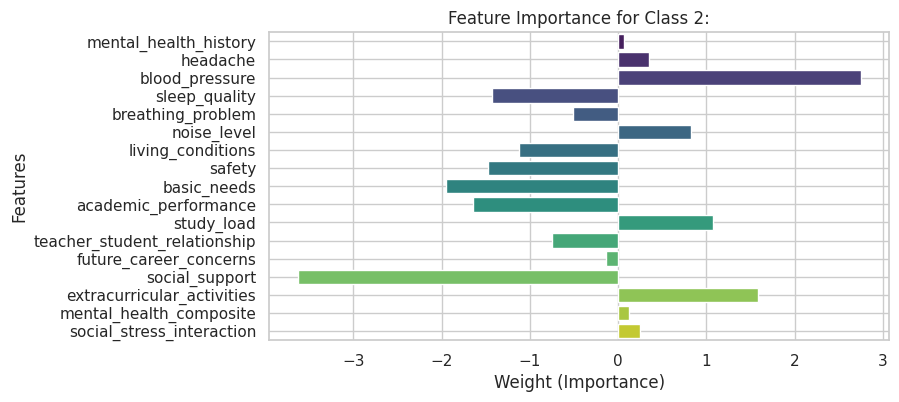

In [249]:
def plot_feature_importance(W, feature_names, class_names):
    n_classes = W.shape[1]

    for i in range(n_classes):
        plt.figure(figsize=(8, 4))
        weights = W[:, i]  # weights for class i

        sns.barplot(x=weights, y=feature_names, palette="viridis")
        plt.title(f'Feature Importance for Class {class_names[i]}:')
        plt.xlabel('Weight (Importance)')
        plt.ylabel('Features')
        plt.grid(True)
        plt.show()

plot_feature_importance(Weights_trained, X.columns, np.unique(y))